In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%config InlineBackend.figure_format = 'retina'

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import statsmodels.api as sm

In [5]:
from datetime import datetime

## Loading Dataset & Filtering

In [6]:
df = pd.read_csv("us_employment.csv", sep=',', date_parser='Month')[['Month', 'Series_ID', 'Title', 'Employed']]

In [7]:
d = pd.read_csv('us_employment.csv')
us_retail_employment = (
    d
    .assign(date=pd.to_datetime(d.Month, format='%Y %b'))
    .assign(year=(lambda x : x.date.dt.year))
    .query("year >= 1990 and Title == 'Retail Trade'")
    .set_index('date')
) 

## Converting to Timeseries

In [8]:
timeseries = pd.Series(us_retail_employment['Employed'], index=us_retail_employment.index)

In [9]:
timeseries.head(8)

date
1990-01-01    13255.8
1990-02-01    12966.3
1990-03-01    12938.2
1990-04-01    13012.3
1990-05-01    13108.3
1990-06-01    13182.8
1990-07-01    13170.1
1990-08-01    13159.5
Name: Employed, dtype: float64

## Data Health Checking

In [10]:
timeseries.isna().sum()

0

## First Plot

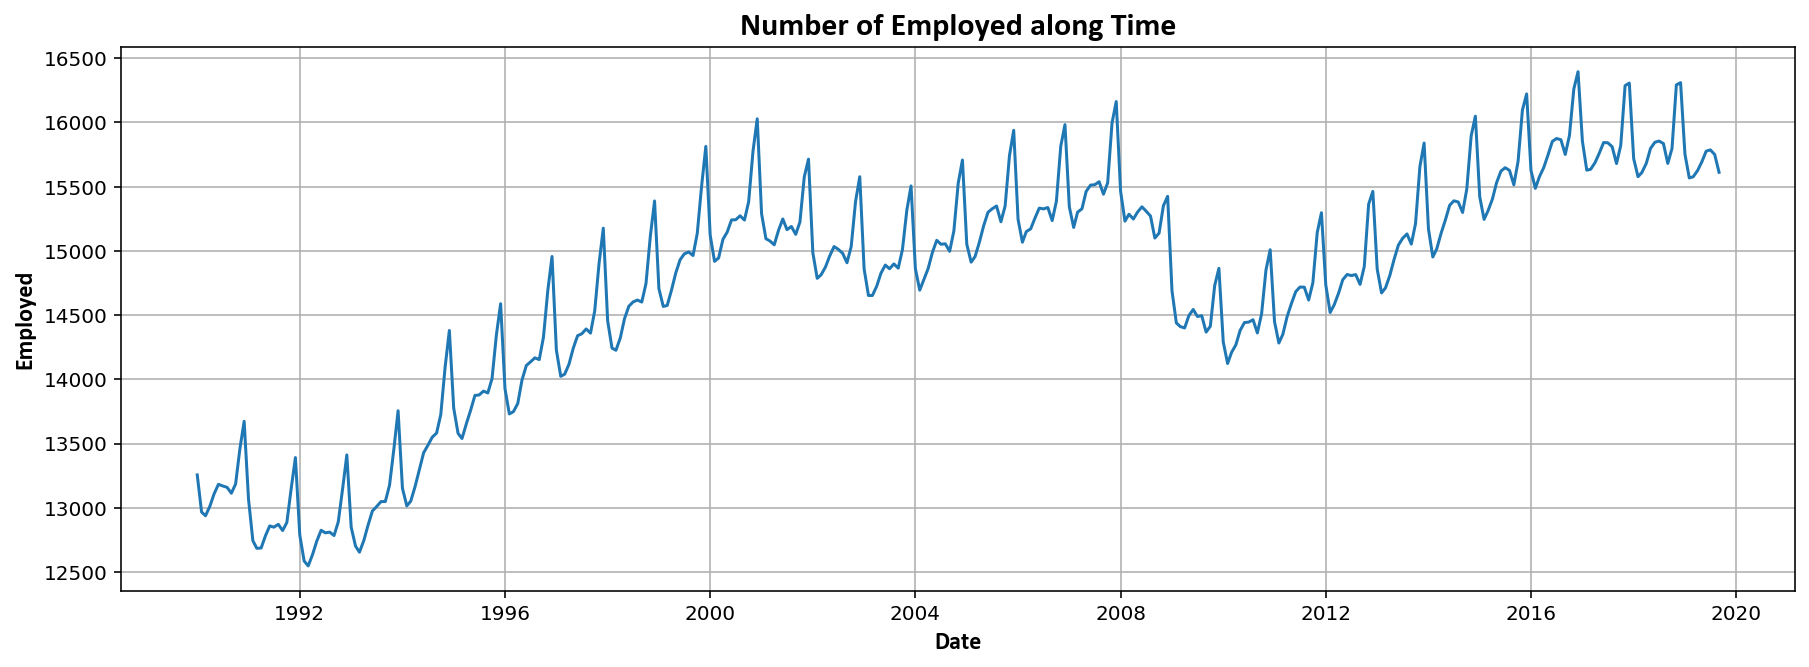

In [11]:
# # Para tirar a densidade do gráfico, exibe uma amostra de 10% do total
fig, ax = plt.subplots(ncols=1, figsize = (15,5))
hfont = {'fontname':'Calibri'}

sns.lineplot(data=timeseries, ax=ax, linestyle='-');
plt.title("Number of Employed along Time", fontsize=16, fontdict=dict(weight='bold'), **hfont)
ax.set_xlabel("Date", fontsize=12, fontdict=dict(weight='bold'), **hfont);
ax.set_ylabel("Employed", fontsize=12, fontdict=dict(weight='bold'), **hfont);
ax.grid()

## Bianual Plot

In [12]:
bianual_timeseries = (
    timeseries[(timeseries.index >= datetime(year=1998, month=1, day=1)) & 
               (timeseries.index <= datetime(year=2000, month=1, day=1))
              ]
)

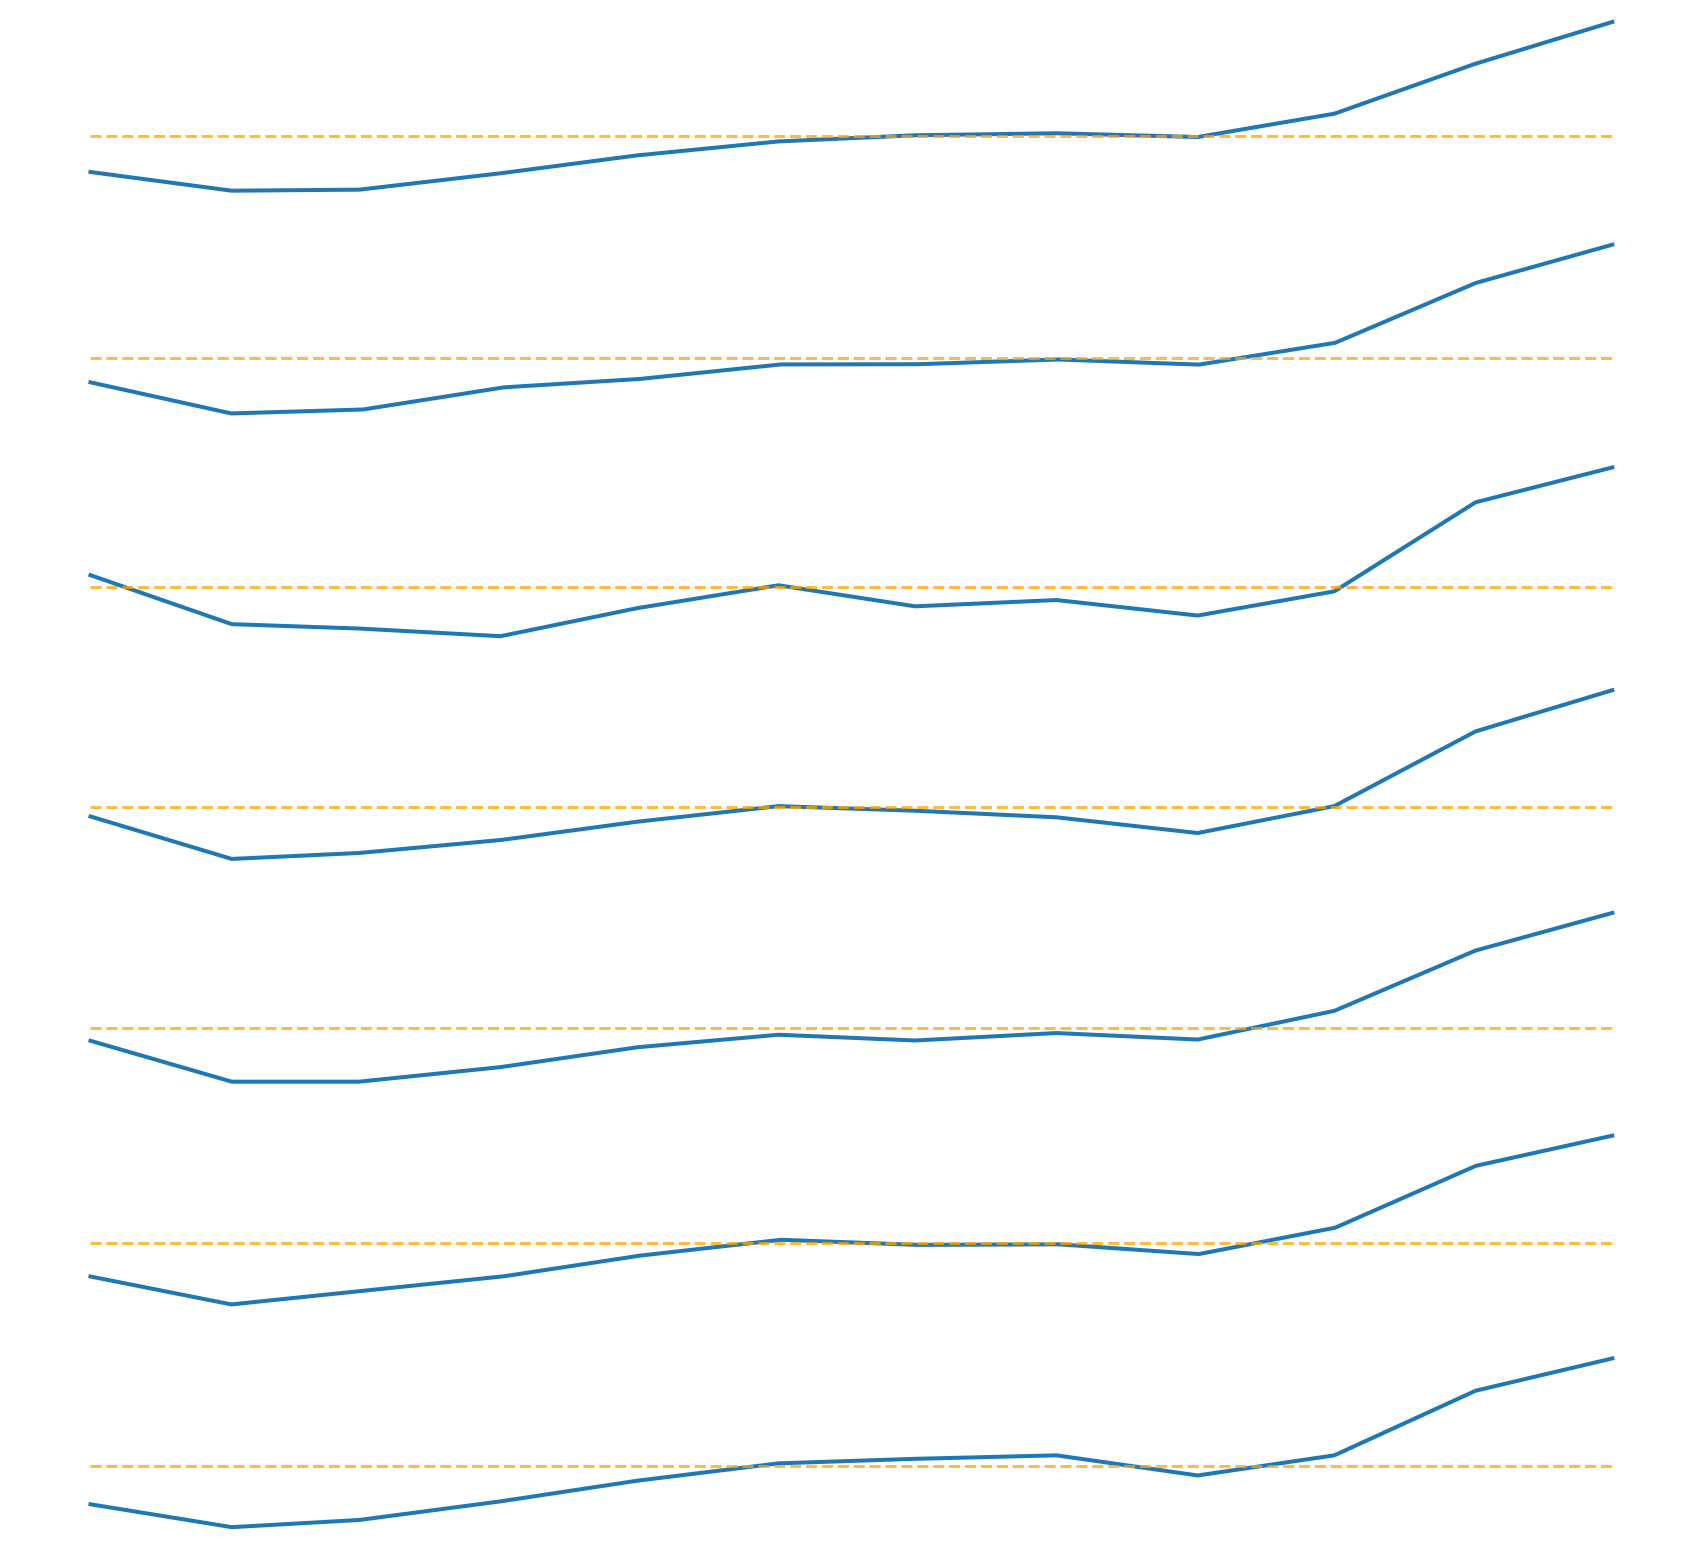

In [13]:
years = [1999,2000,2001,2002,2003,2004,2005]

fig, ax = plt.subplots(nrows=len(years), figsize = (15,14))

for i, y in enumerate(years):
    d = timeseries[(timeseries.index.year == y)]

    fit = sm.tsa.STL(d).fit()
    sns.lineplot(data=d, ax=ax[i], linestyle='-', linewidth=2);
    sns.lineplot(data=fit.trend, ax=ax[i], linestyle='--', alpha=.75, color='orange');
    ax[i].grid();
    ax[i].axis('off')

In [14]:
fit = sm.tsa.STL(timeseries).fit()

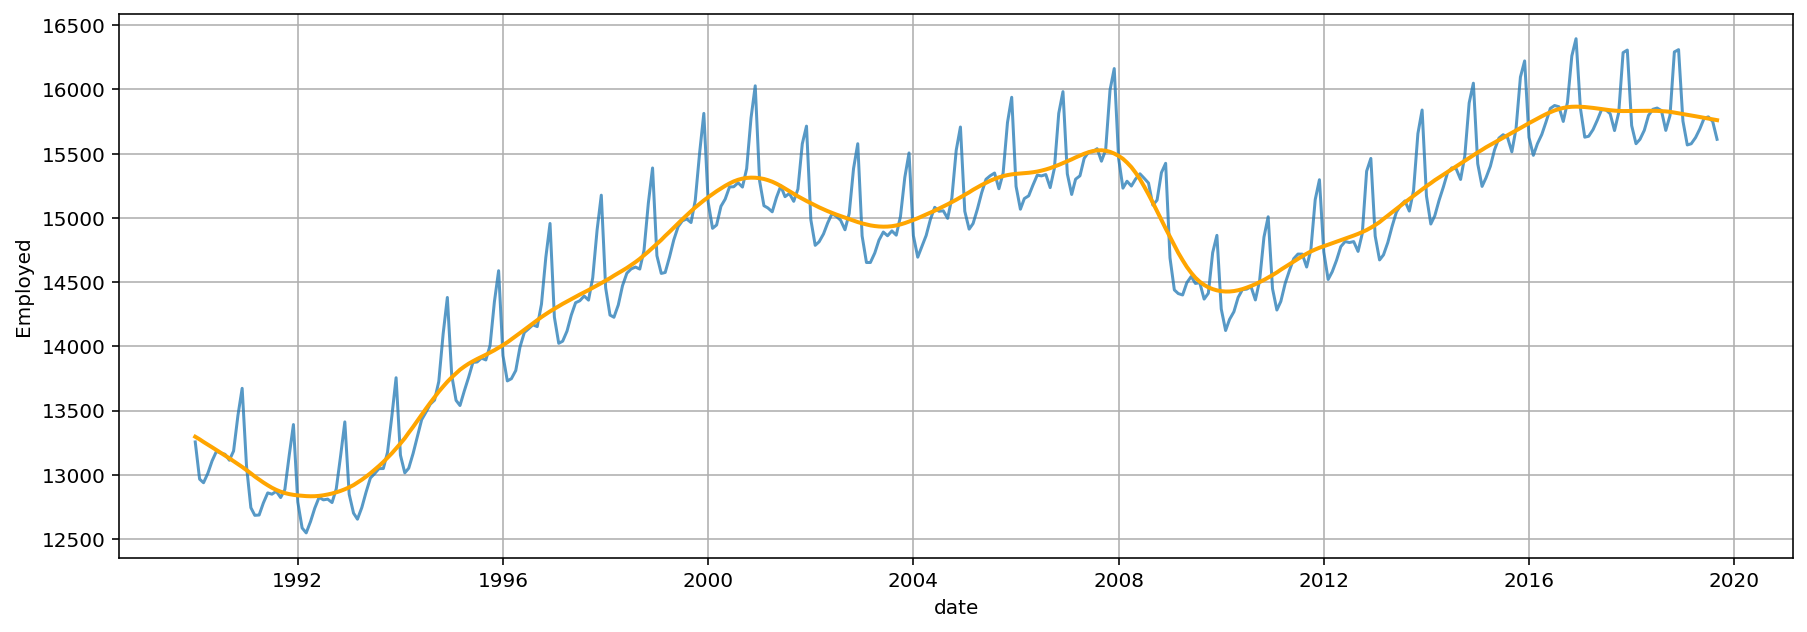

In [15]:
fig, ax = plt.subplots(ncols=1, figsize = (15,5))

sns.lineplot(data=timeseries, ax=ax, linestyle='-', alpha=.75);
sns.lineplot(data=fit.trend, ax=ax, linestyle='-', color='orange', linewidth=2);
ax.grid();

## Ploting ACF

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

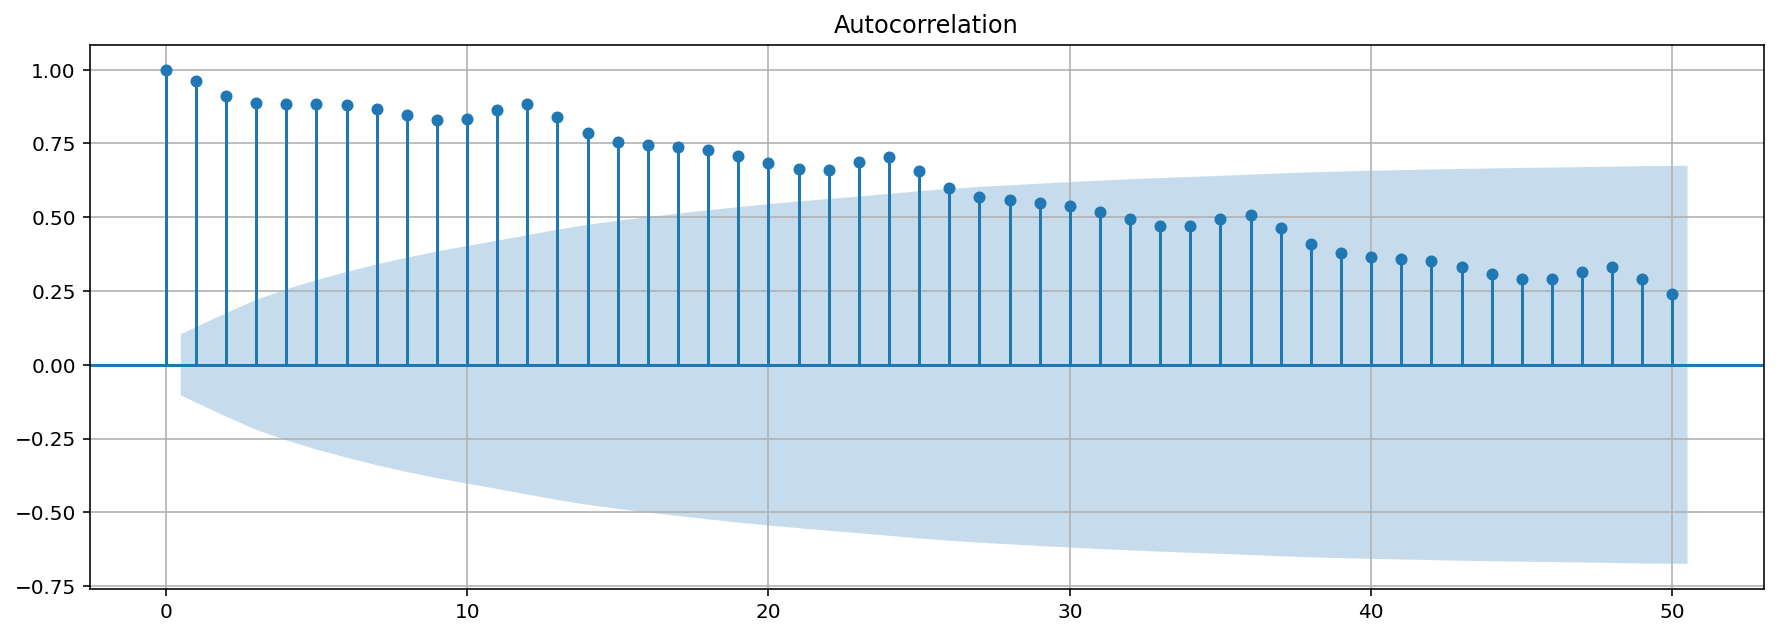

In [17]:
fig, ax = plt.subplots(ncols=1, figsize = (15,5))
plot_acf(timeseries, lags=50, ax=ax);
ax.grid()

## Getting the Differences

In [18]:
# Inbuilt function
diff_timeseries = timeseries.diff()

In [19]:
diff_timeseries = diff_timeseries.dropna()

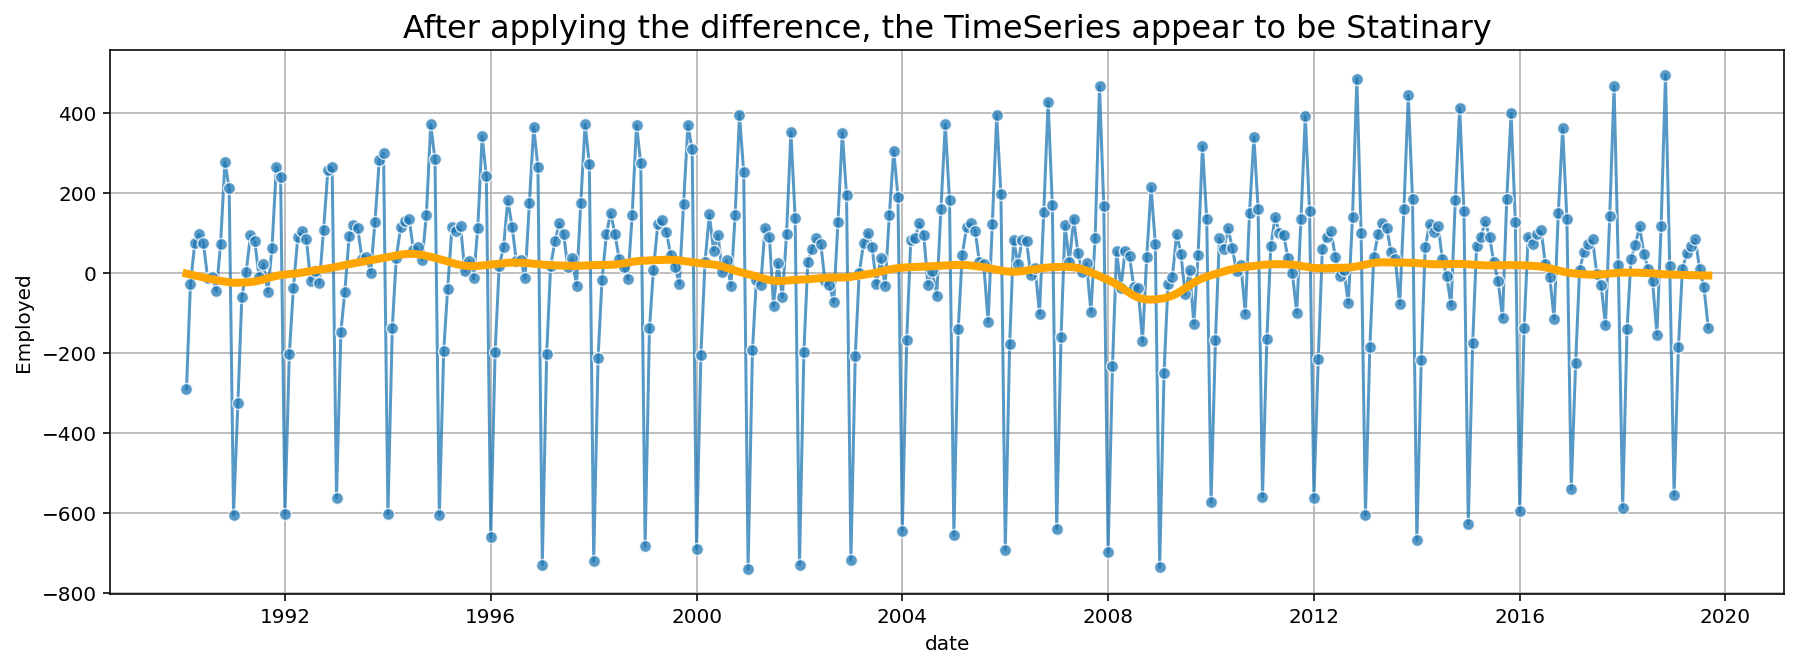

In [20]:
fig, ax = plt.subplots(ncols=1, figsize = (15,5))

sns.lineplot(data=diff_timeseries, ax=ax, linestyle='-', alpha=.75, marker='o');

fit = sm.tsa.STL(diff_timeseries).fit()

plt.title("After applying the difference, the TimeSeries appear to be Statinary", fontsize=16)
sns.lineplot(data=fit.trend, ax=ax, linestyle='-', color='orange', linewidth=4);
ax.grid();

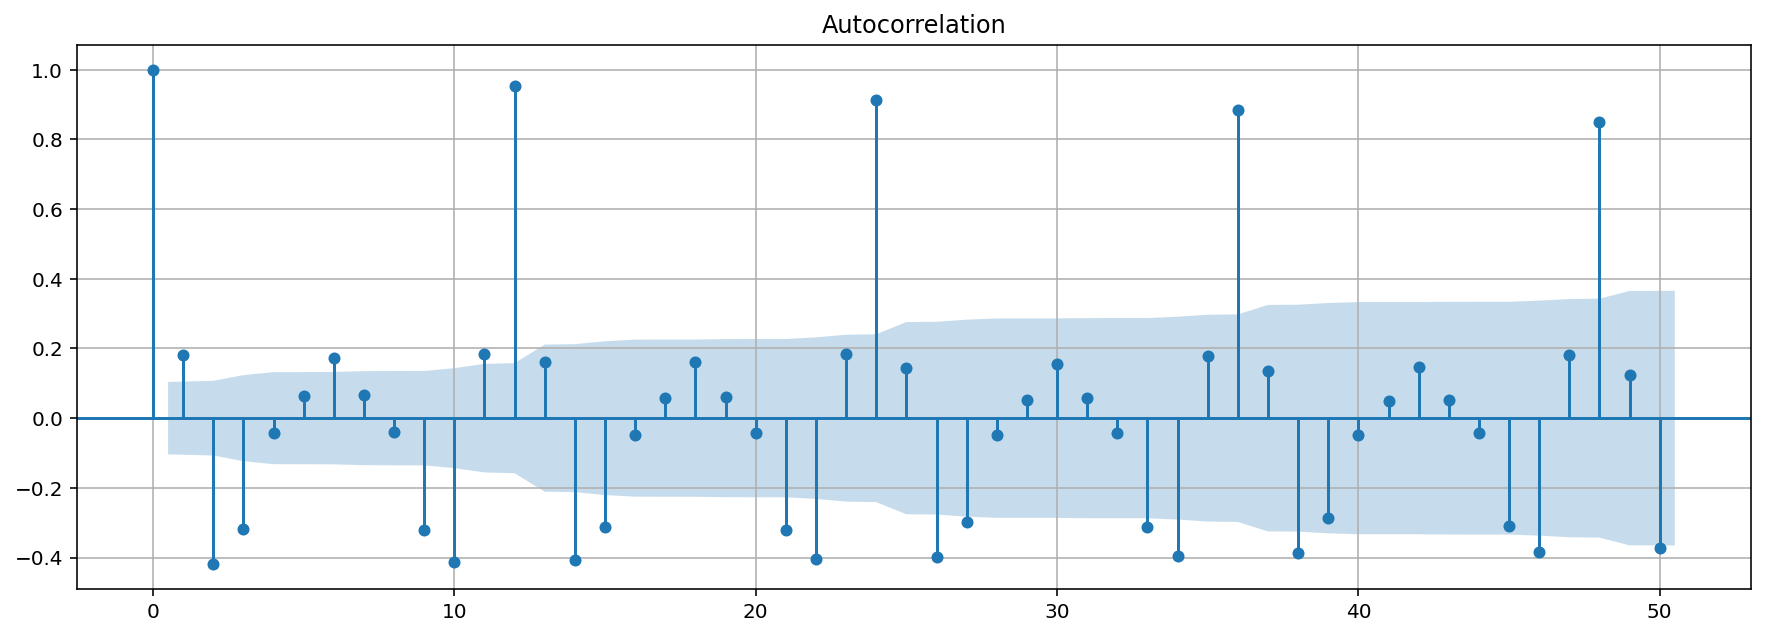

In [21]:
fig, ax = plt.subplots(ncols=1, figsize = (15,5))
plot_acf(diff_timeseries, lags=50, ax=ax);
ax.grid()

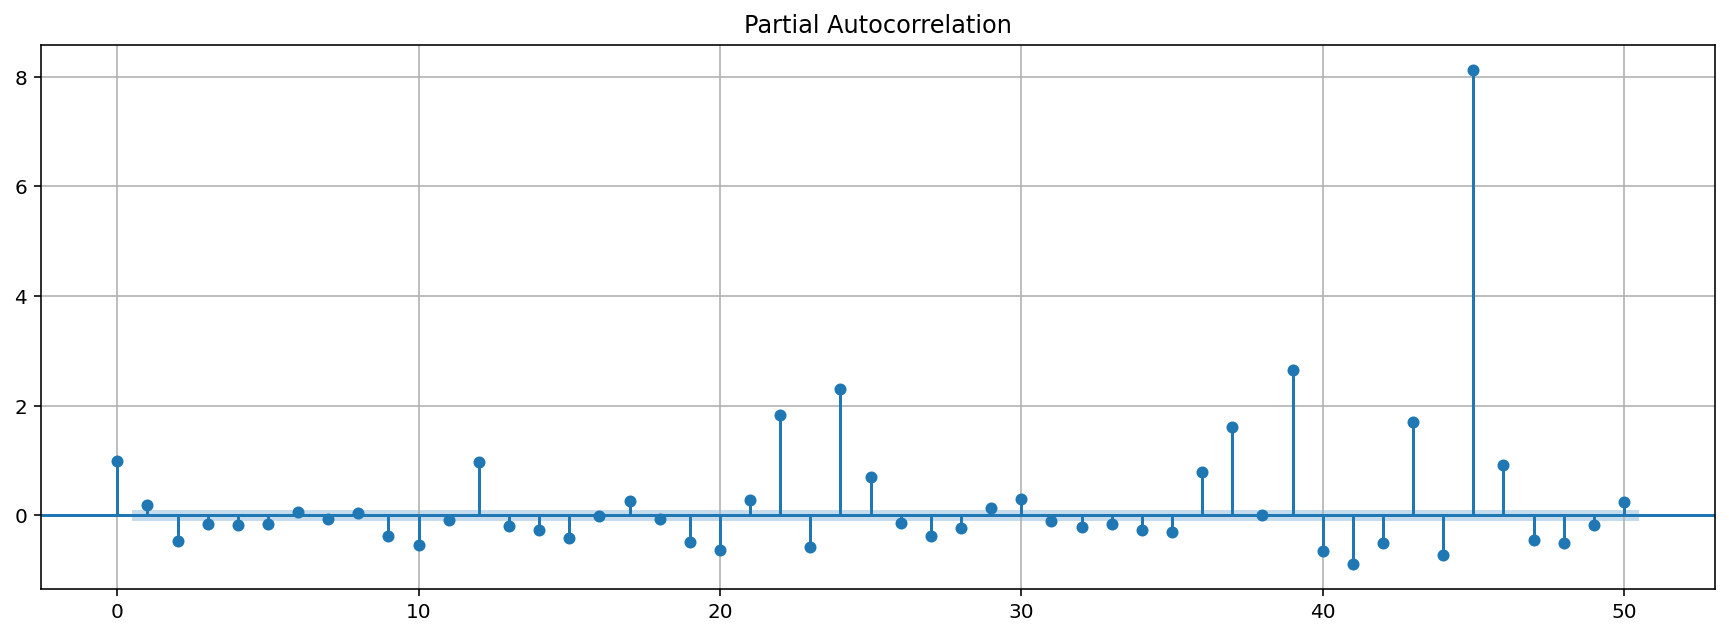

In [22]:
fig, ax = plt.subplots(ncols=1, figsize = (15,5))
plot_pacf(diff_timeseries, lags=50, ax=ax);
ax.grid()

## Testing Unitary Root - ADF

- **null hypothesis** -> THERE IS A UNIT ROOT
- **alt hypothesis** -> THERE IS A UNIT ROOT

The **null hypothesis** of the Augmented Dickey-Fuller is that there is a unit
root, with the alternative that there is no unit root. If the pvalue is
above a critical size, then we cannot reject that there is a unit root.

In [23]:
# calculate the stationarity of a random walk
from statsmodels.tsa.stattools import adfuller

def adf_testing(s):
    result = adfuller(s)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [24]:
adf_testing(timeseries)

ADF Statistic: -2.546618
p-value: 0.104540
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


    This is larger than all of the critical values at the 1%, 5%, and 10% confidence levels. Therefore, we can say that the time series does appear to be non-stationary with a low likelihood of the result being a statistical fluke.

In [25]:
adf_testing(diff_timeseries)

ADF Statistic: -3.742277
p-value: 0.003556
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


    This is smaller than all of the critical values at the 1%, 5%, and 10% confidence levels. Therefore, we can say that the time series does appear to be stationary with a low likelihood of the result being a statistical fluke.

## Testing...

In [55]:
%config InlineBackend.figure_format='retina'


In [82]:
x = np.linspace(start=1,stop=10*np.pi, num=1000)

In [83]:
y1 = np.sin(x)
s1 = pd.Series(y1)

In [84]:
y2 = np.cos(x)
s2 = pd.Series(y2)

In [85]:
s3 = s1.diff().dropna() * 8

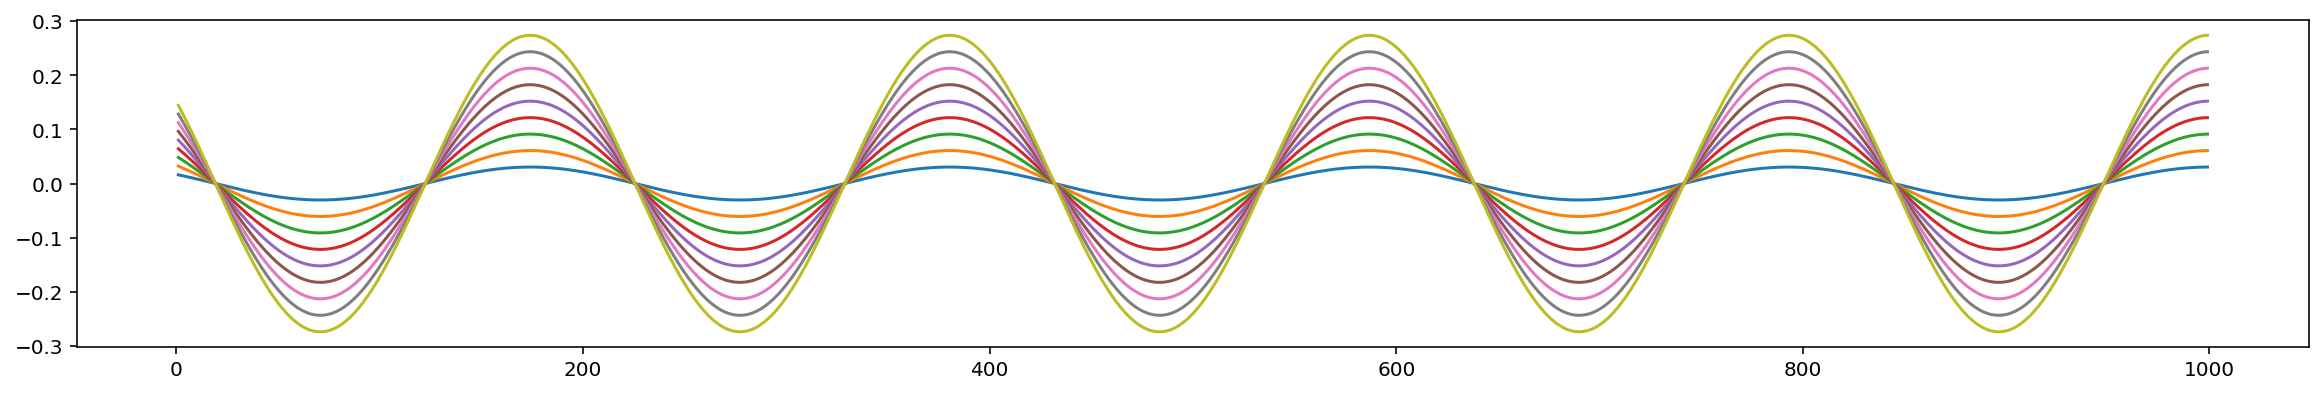

In [87]:
plt.figure(figsize=(20,3))
# s1.plot();

for i in range(1,10):
    s3 = s1.diff().dropna() * i
#     s2.plot();
    s3.plot();